In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("heart_disease_prediction.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:>

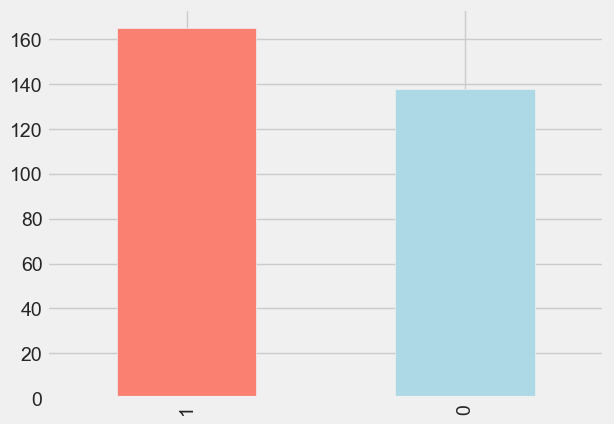

In [6]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

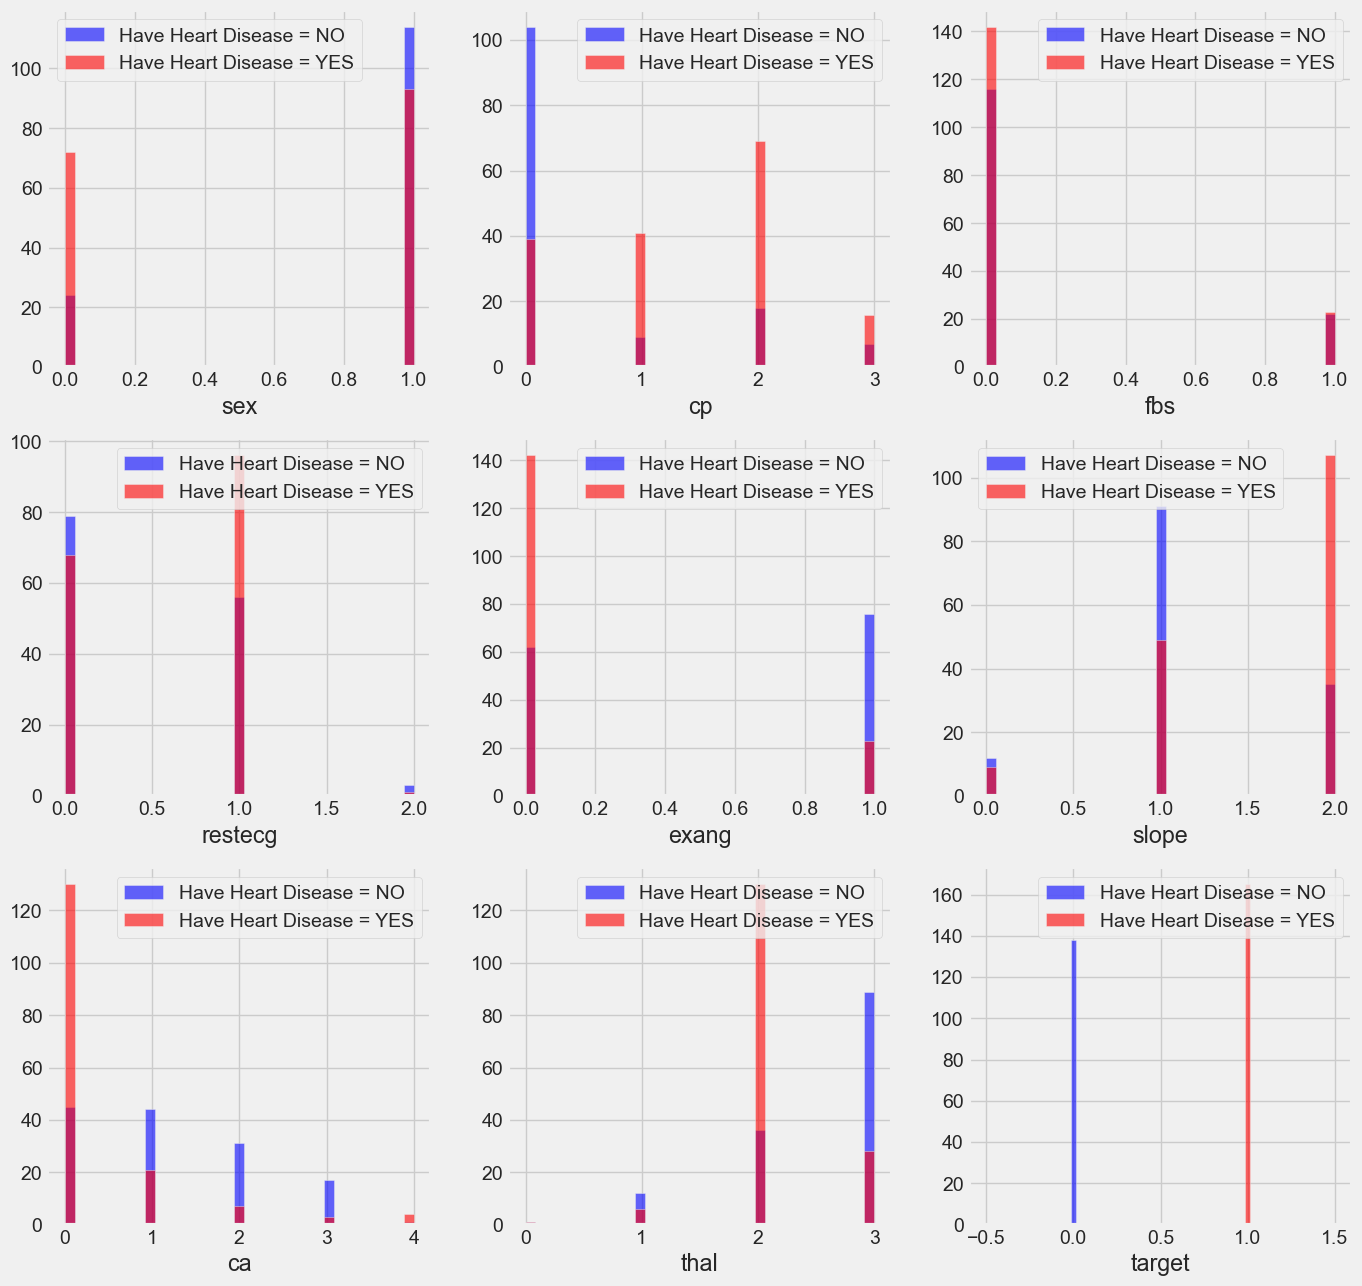

In [9]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

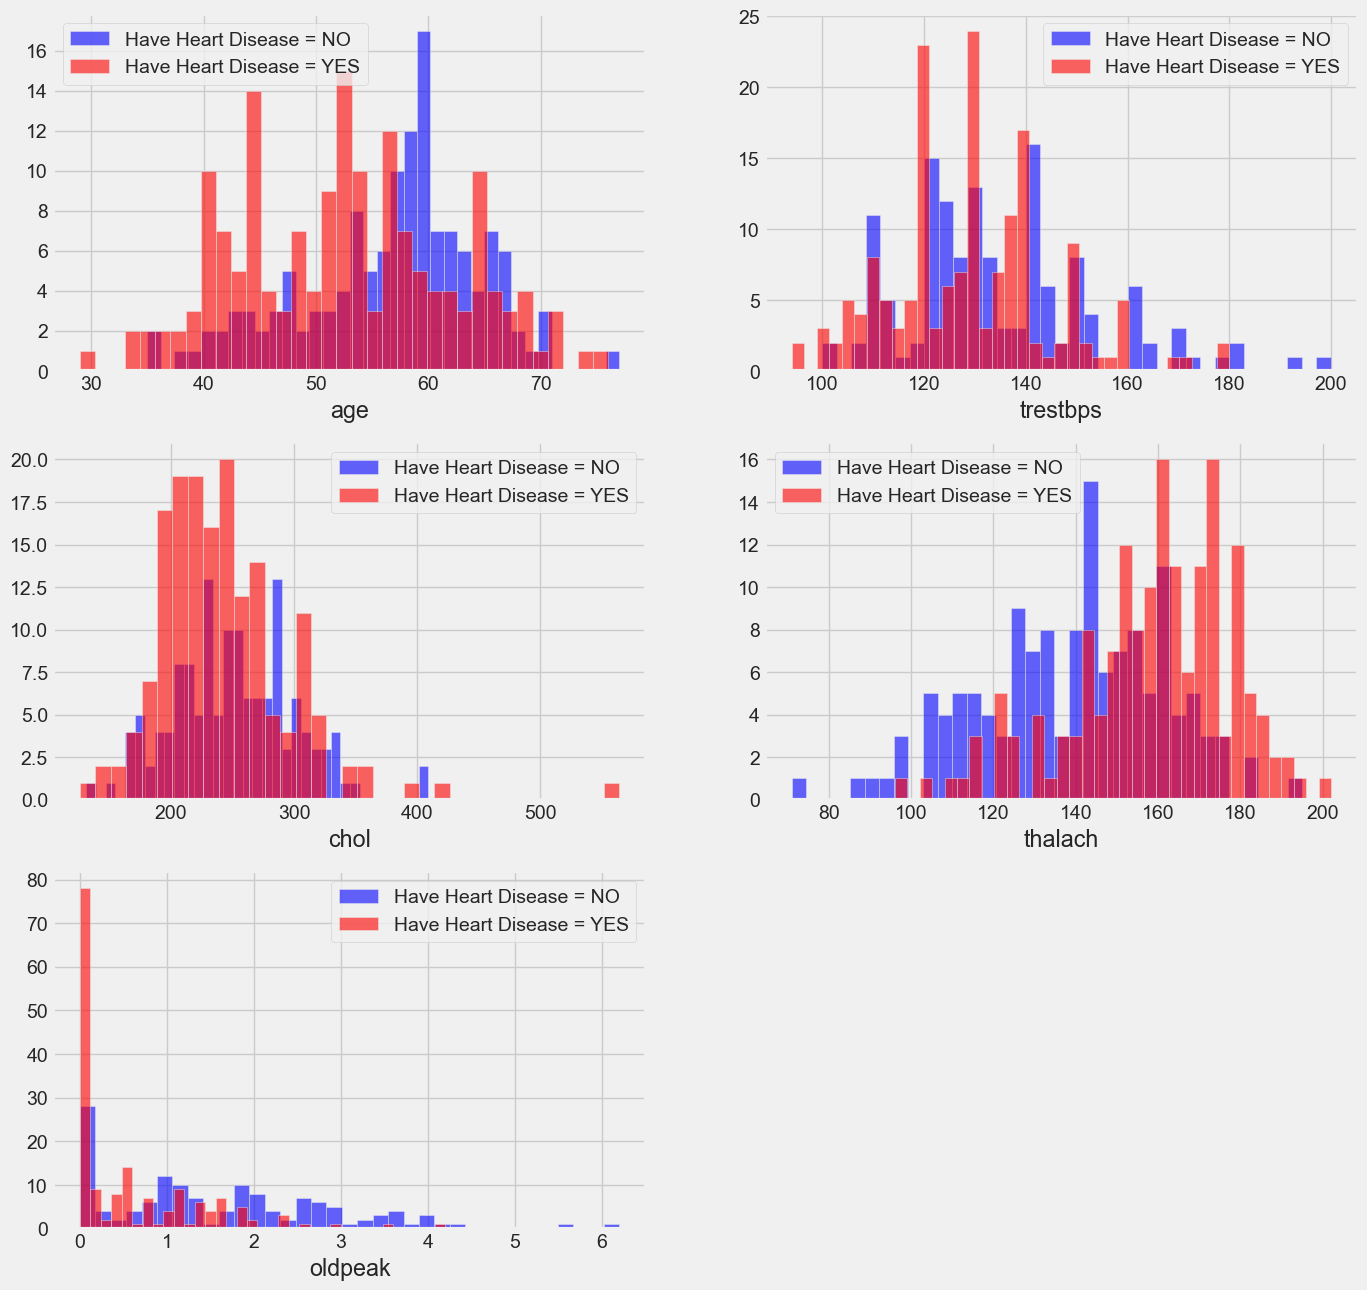

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

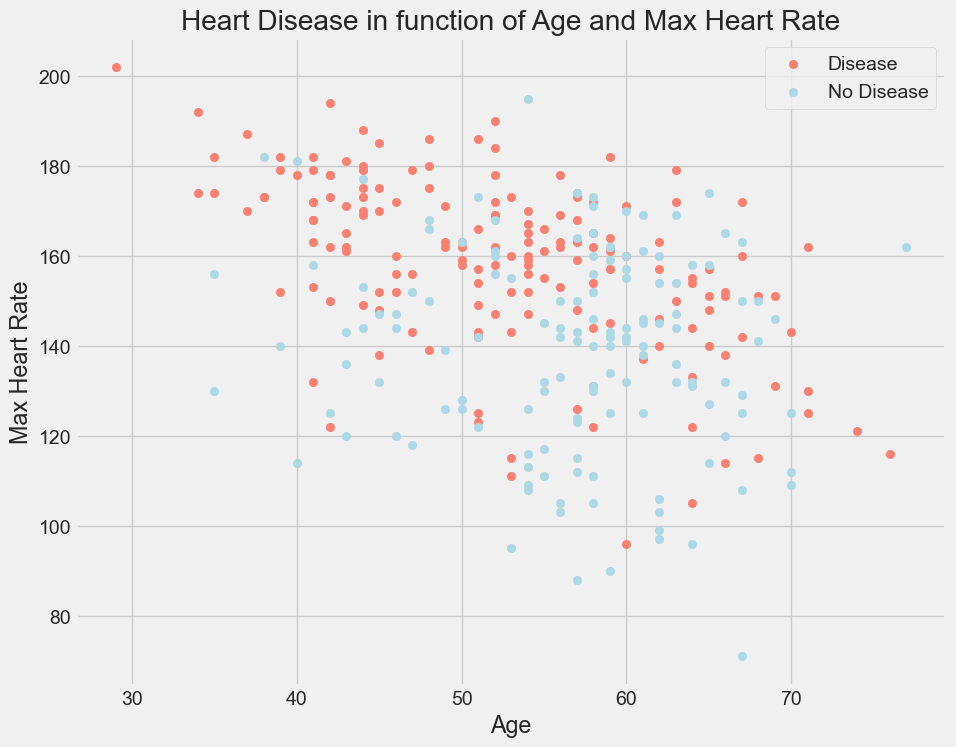

In [15]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

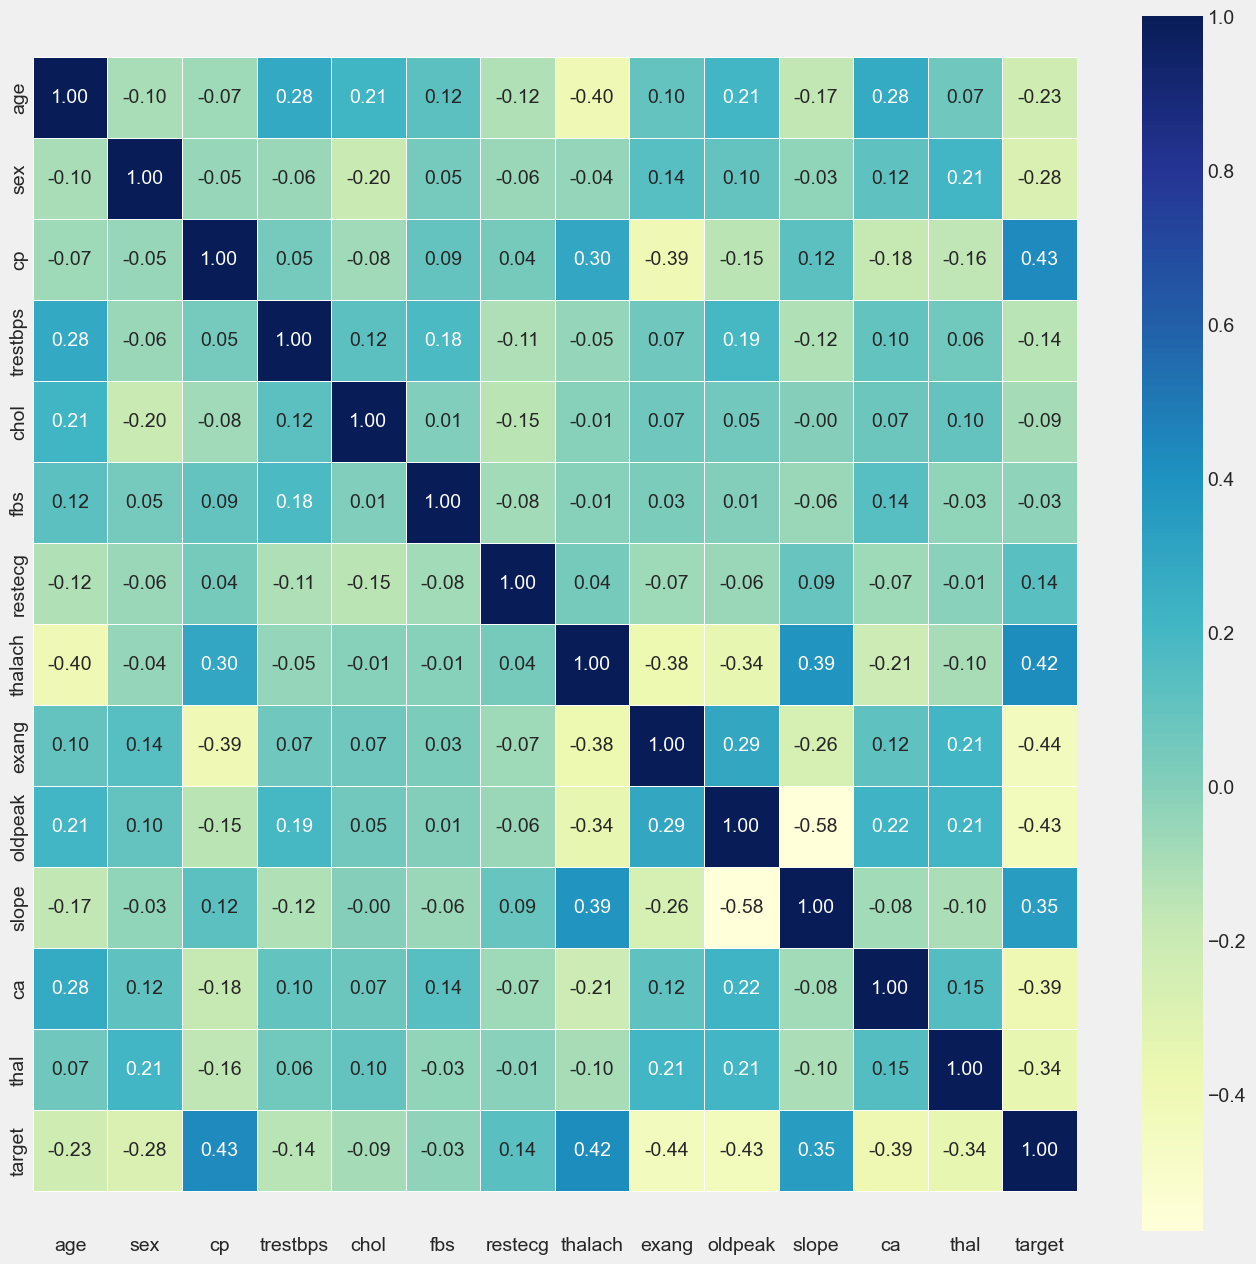

In [16]:
# Let's make our correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

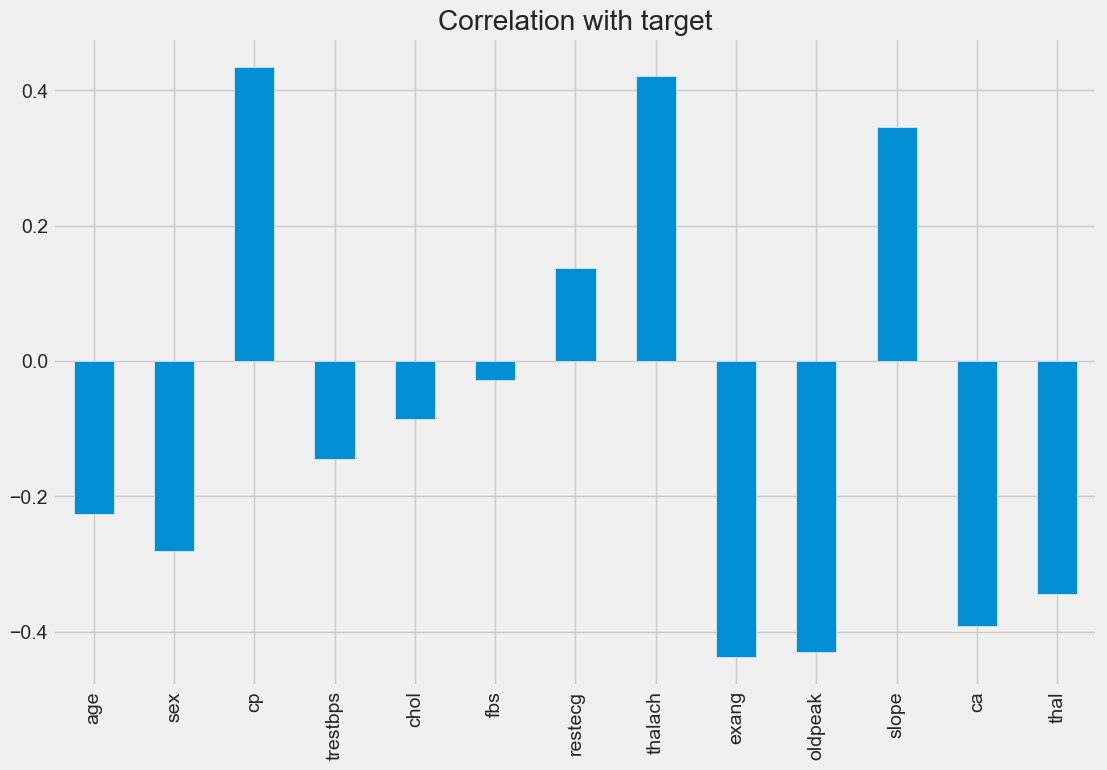

In [17]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),
    title="Correlation with target")

In [18]:
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [19]:
#data preprocessing
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])




In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_____________

In [25]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression",train_score, test_score]], 
        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187


In [26]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn.fit(X_train_scaled, y_train)

# Training accuracy
y_train_pred = knn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred) * 100
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test, y_test_pred)

results_df = pd.DataFrame(data=[["KNN",train_accuracy, test_accuracy,precision,recall, f1  ]], 
        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','precision','recall value','f1-score'])
results_df



C:\Users\NIKITA CHAUHAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\NIKITA CHAUHAN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

,Model,Training Accuracy %,Testing Accuracy %,precision,recall value,f1-score
0,KNN,90.566038,78.021978,0.826087,0.76,0.791667


In [31]:

decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
decision_tree.fit(X_train, y_train)

# Training accuracy
y_train_pred = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred) * 100
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test, y_test_pred)

results_df = pd.DataFrame(data=[["Decision Tree",train_accuracy, test_accuracy,precision,recall, f1  ]], 
        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','precision','recall value','f1-score'])
results_df


,Model,Training Accuracy %,Testing Accuracy %,precision,recall value,f1-score
0,Decision Tree,100.0,78.021978,0.840909,0.74,0.787234


In [32]:

random_forest = RandomForestClassifier(random_state=42)

# Train the classifier
random_forest.fit(X_train, y_train)

# Predictions on training data
train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on testing data
test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

test_accuracy = accuracy_score(y_test, test_predictions) * 100
train_accuracy = accuracy_score(y_train, train_predictions) * 100

precision = precision_score(y_test,test_predictions)
recall = recall_score(y_test,test_predictions)
f1 = f1_score(y_test, test_predictions)

results_df = pd.DataFrame(data=[["Random Forest",train_accuracy, test_accuracy,precision,recall, f1  ]], 
        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','precision','recall value','f1-score'])
results_df


,Model,Training Accuracy %,Testing Accuracy %,precision,recall value,f1-score
0,Random Forest,100.0,82.417582,0.84,0.84,0.84


In [33]:
from sklearn.svm import SVC 
svm_classifier = SVC(random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions on training data
train_predictions = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on testing data
test_predictions = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)


test_accuracy = accuracy_score(y_test, test_predictions) * 100
train_accuracy = accuracy_score(y_train, train_predictions) * 100
 
precision = precision_score(y_test,test_predictions)
recall = recall_score(y_test,test_predictions)
f1 = f1_score(y_test, test_predictions)

results_df = pd.DataFrame(data=[["SVM",train_accuracy, test_accuracy,precision,recall, f1  ]], 
        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','precision','recall value','f1-score'])
results_df


,Model,Training Accuracy %,Testing Accuracy %,precision,recall value,f1-score
0,SVM,91.981132,87.912088,0.897959,0.88,0.888889
